## Imports

In [2]:
import numpy as np
np.random.seed(0)
import torch
torch.manual_seed(0)
import random
random.seed(0)
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Module
import cv2
import os
import torchvision
import matplotlib.pyplot as plt 
from PIL import Image
from keras import backend as K

## Denoising


Input image size:  (512, 512, 3)
Padded image size:  (516, 516, 3)
Output image size:  (512, 512, 3)


[]

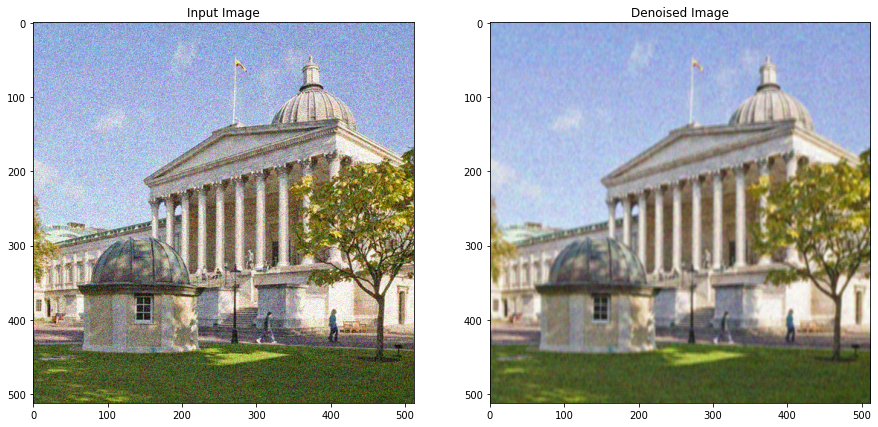

In [ ]:
noisy_image_filename = "Filtering/noisy_image.png"
noisy_image_filename = "noisy_image.png"

# LOAD noisy_image FROM noisy_image_filename
noisy_image = cv2.cvtColor(cv2.imread(noisy_image_filename), cv2.COLOR_BGR2RGB) / 255.0
print("Input image size: ",noisy_image.shape)

def denoise_gauss(image):
    # IMPLEMENT THIS FUNCTION

    # kernel based on integer aproximation of Gaussion
    # reference: https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm
    kernel = np.array([[1,  4,  7,  4, 1],
                       [4, 16, 26, 16, 4],
                       [7, 26, 41, 26, 7],
                       [4, 16, 26, 16, 4],
                       [1,  4,  7,  4, 1]])

    # Adding padding of zeros (zise 2) around the image for convolution calculation
    paddedImage = np.pad(image, ((2, 2), (2, 2), (0,0)), 'edge')
    print("Padded image size: ",paddedImage.shape)

    # splitting RGB image into its 3 channels to execure convulution on each separately
    r,g,b = np.split(paddedImage, 3, axis=2)

    # output image same shape as input
    denoised_image_r = np.zeros((image.shape[0],image.shape[1]))
    denoised_image_g = np.zeros((image.shape[0],image.shape[1]))
    denoised_image_b = np.zeros((image.shape[0],image.shape[1]))
    xKernShape = kernel.shape[0] 
    yKernShape = kernel.shape[1] 
    
    # going thorugh the image
    for y in range(image.shape[1]):
      for x in range(image.shape[0]):
        # convoluting the image and the kernel
        denoised_image_r[x, y] = (kernel * r[x: x + xKernShape, y: y + yKernShape]).sum()
        denoised_image_g[x, y] = (kernel * g[x: x + xKernShape, y: y + yKernShape]).sum()
        denoised_image_b[x, y] = (kernel * b[x: x + xKernShape, y: y + yKernShape]).sum()

    # normalizing the data
    denoised_image_r = denoised_image_r / np.max(denoised_image_r)
    denoised_image_g = denoised_image_g / np.max(denoised_image_g)
    denoised_image_b = denoised_image_b / np.max(denoised_image_b)

    # stacking all layers back to NxMx3 for RGB image
    denoised_image = np.dstack((denoised_image_r, denoised_image_g, denoised_image_b))
    return denoised_image

denoised_image = denoise_gauss(noisy_image)
print("Output image size: ",denoised_image.shape)

# DISPLAY input_image AND denoised_image here
fig, axis = plt.subplots(1, 2, figsize = (15,15))
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(noisy_image, vmin=0 , vmax=1)
plt.subplot(1, 2, 2)
plt.title("Denoised Image")
plt.imshow(denoised_image, vmin=0 , vmax=1)
plt.plot()

### Pyramidal encoder-decoder to denoise an image.  


Epochs: 500 | Learning rate: 0.001 | Batch Size: 1
Epoch: 1 / 500  |  Loss: 0.05203011541420387


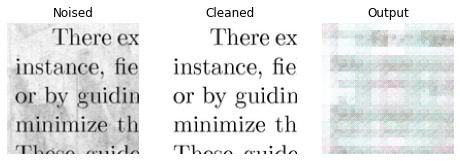

Epoch: 11 / 500  |  Loss: 0.030147664818084903


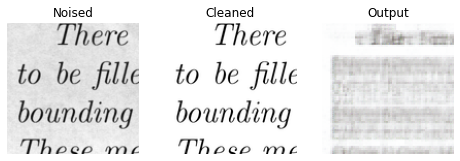

Epoch: 21 / 500  |  Loss: 0.029826377854785986


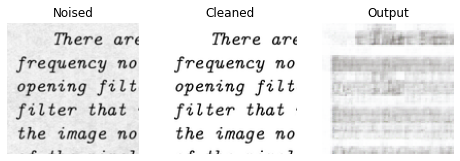

Epoch: 31 / 500  |  Loss: 0.02206183356853823


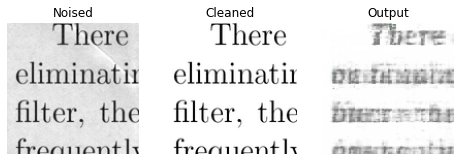

Epoch: 41 / 500  |  Loss: 0.018012762664713793


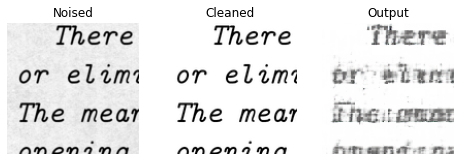

Epoch: 51 / 500  |  Loss: 0.014975666023221694


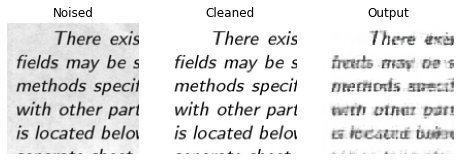

Epoch: 61 / 500  |  Loss: 0.012874139550452432


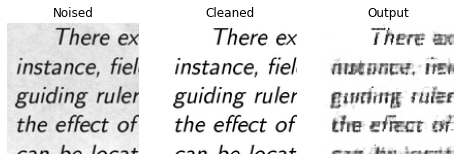

Epoch: 71 / 500  |  Loss: 0.011524930098352747


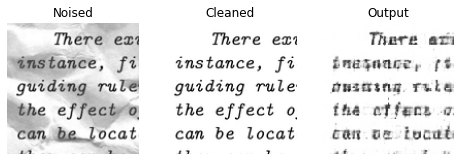

Epoch: 81 / 500  |  Loss: 0.010877470582878837


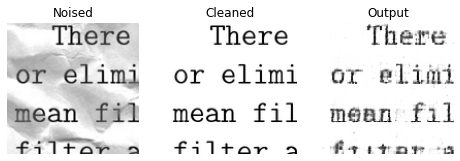

Epoch: 91 / 500  |  Loss: 0.01031683137989603


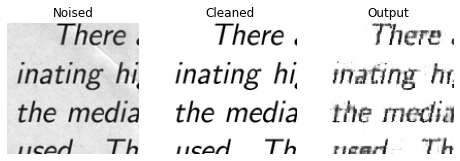

Epoch: 101 / 500  |  Loss: 0.00984661178275322


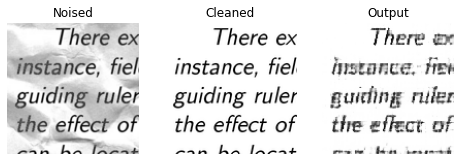

Epoch: 111 / 500  |  Loss: 0.009761389315826818


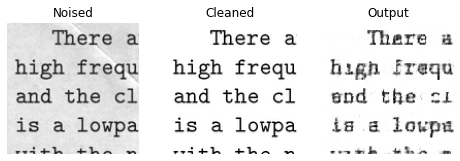

Epoch: 121 / 500  |  Loss: 0.009577835893853463


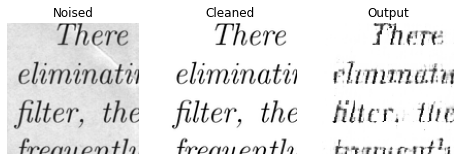

Epoch: 131 / 500  |  Loss: 0.009317680527197404


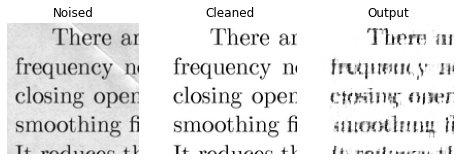

Epoch: 141 / 500  |  Loss: 0.009178424283163622


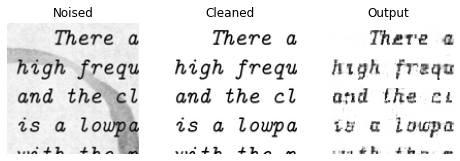

Epoch: 151 / 500  |  Loss: 0.009006521473768063


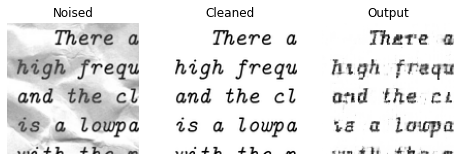

Epoch: 161 / 500  |  Loss: 0.009031222311831597


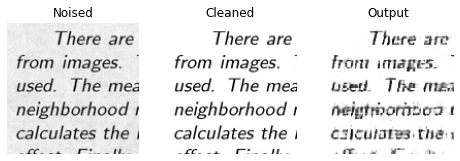

Epoch: 171 / 500  |  Loss: 0.008652598610044353


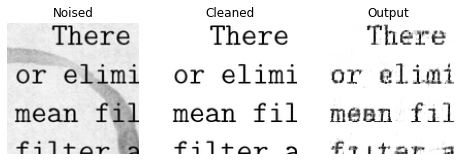

Epoch: 181 / 500  |  Loss: 0.008712621725862846


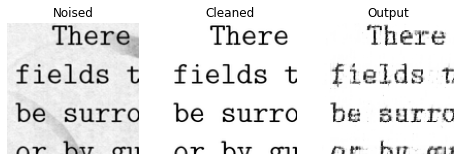

Epoch: 191 / 500  |  Loss: 0.008600861416198313


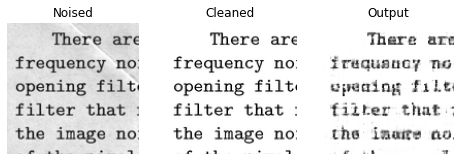

Epoch: 201 / 500  |  Loss: 0.008516025891165353


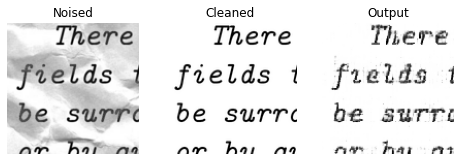

Epoch: 211 / 500  |  Loss: 0.008492054268976467


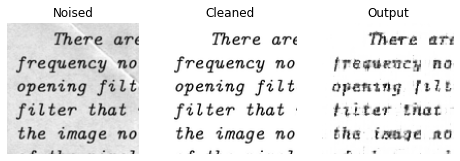

Epoch: 221 / 500  |  Loss: 0.008582245720188238


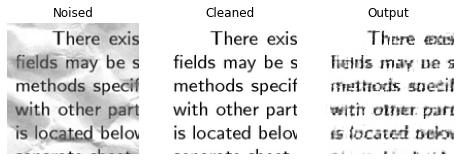

Epoch: 231 / 500  |  Loss: 0.00827826738693855


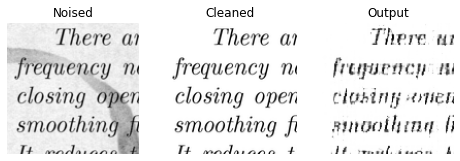

Epoch: 241 / 500  |  Loss: 0.00823543757885798


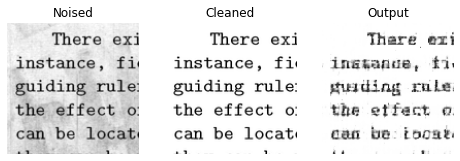

Epoch: 251 / 500  |  Loss: 0.008161254366213042


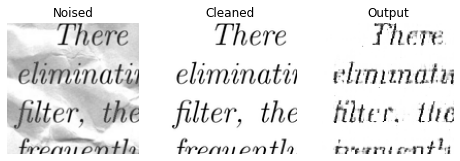

Epoch: 261 / 500  |  Loss: 0.008030415942711342


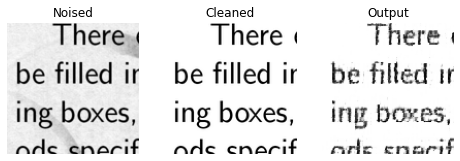

Epoch: 271 / 500  |  Loss: 0.008008902640237162


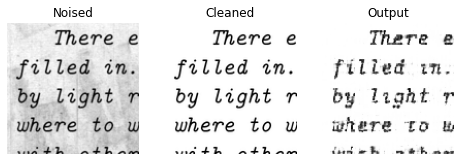

Epoch: 281 / 500  |  Loss: 0.00808412707475428


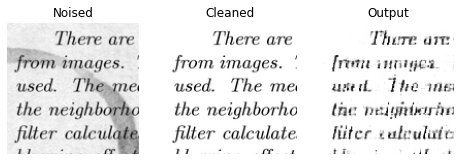

Epoch: 291 / 500  |  Loss: 0.007939526419957273


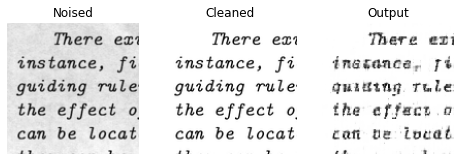

Epoch: 301 / 500  |  Loss: 0.007943100101935366


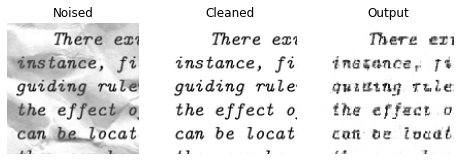

Epoch: 311 / 500  |  Loss: 0.007949290234440317


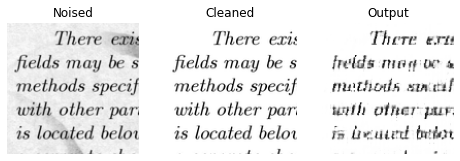

Epoch: 321 / 500  |  Loss: 0.007870389187398056


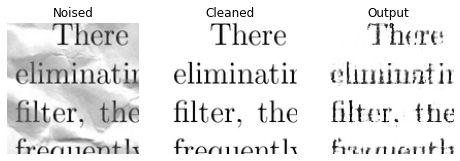

Epoch: 331 / 500  |  Loss: 0.007852868031477556


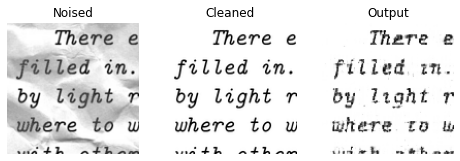

Epoch: 341 / 500  |  Loss: 0.007725773398609211


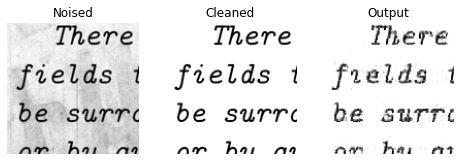

Epoch: 351 / 500  |  Loss: 0.007770663392471356


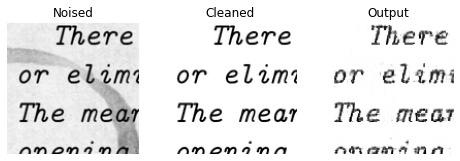

Epoch: 361 / 500  |  Loss: 0.00773666969487547


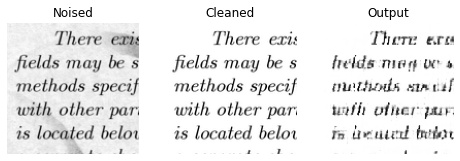

Epoch: 371 / 500  |  Loss: 0.007664276406608729


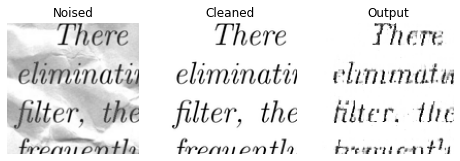

Epoch: 381 / 500  |  Loss: 0.007591023106619509


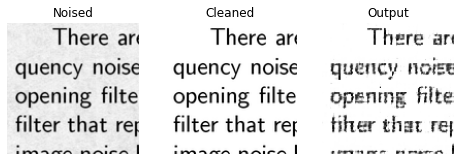

Epoch: 391 / 500  |  Loss: 0.007627688471176144


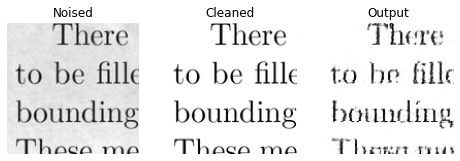

Epoch: 401 / 500  |  Loss: 0.007625773562014931


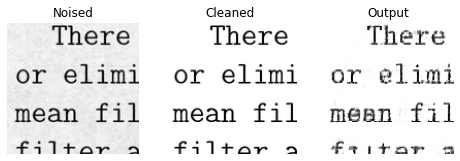

Epoch: 411 / 500  |  Loss: 0.007558451254024274


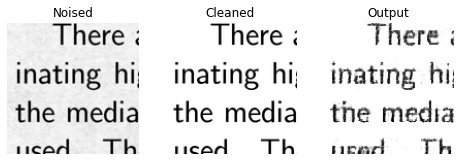

Epoch: 421 / 500  |  Loss: 0.007585769548313692


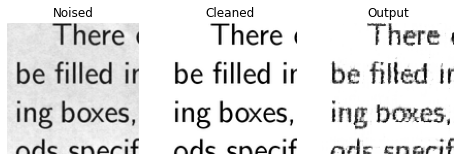

Epoch: 431 / 500  |  Loss: 0.007557553704828024


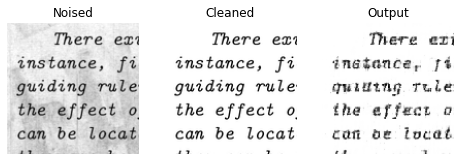

Epoch: 441 / 500  |  Loss: 0.007495858467235748


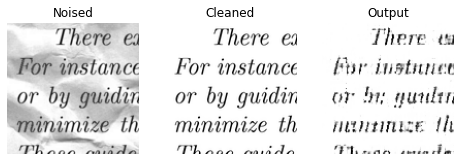

Epoch: 451 / 500  |  Loss: 0.007549005567044433


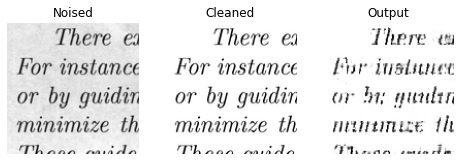

Epoch: 461 / 500  |  Loss: 0.007353036894023212


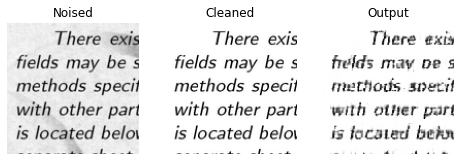

Epoch: 471 / 500  |  Loss: 0.007467496891169705


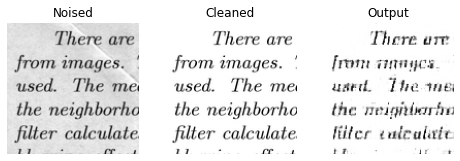

Epoch: 481 / 500  |  Loss: 0.007451673882314935


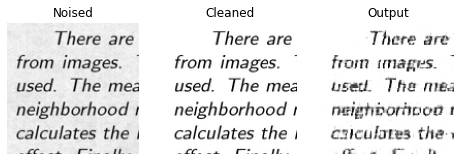

Epoch: 491 / 500  |  Loss: 0.007416460546664894


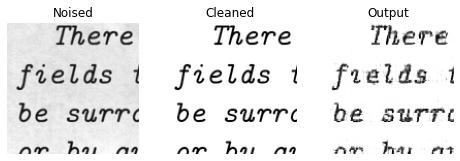

Epoch: 500 / 500  |  Loss: 0.007403479901970261


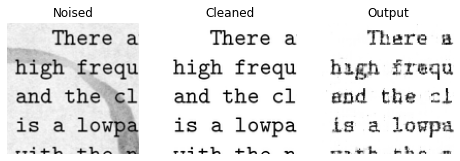

Epochs: 500 | Learning rate: 0.001 | Batch Size: 1


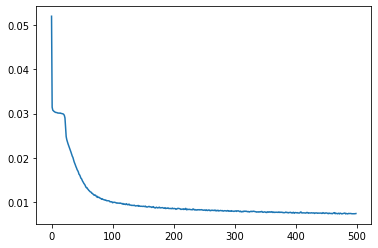

In [4]:
input_imgs_path = "Denoising/input_noisy_images"
cleaned_imgs_path = "Denoising/target_clean_images"
epochs = 500 # CHOOSE YOUR EPOCH SIZE TO GET BEST RESULTS


# This class is partially based on the Lab7 notebook
class DenoisingDB(Dataset):
    # IMPLEMENT THIS DATA LOADING CLASS
    
    def __init__(self, input_imgs_path, cleaned_imgs_path):
        # DEFINE YOUR PARAMETERS AND VARIABLES YOU NEED HERE.

        noisedImageNames = os.listdir(input_imgs_path)
        self.noisedImagePaths = [os.path.join(input_imgs_path,name) for name in noisedImageNames]

        cleanImageNames = os.listdir(cleaned_imgs_path)
        self.cleanImagePaths = [os.path.join(cleaned_imgs_path,name) for name in cleanImageNames]


    def __len__(self):
        # RETURN SIZE OF DATASET
        return len(self.noisedImagePaths)

    def __getitem__(self, idx):
        # RETURN IMAGE AT GIVEN idx
        
        noisedImagePath = self.noisedImagePaths[idx]
        noisyImage = cv2.imread(noisedImagePath)
        noisyImage = noisyImage[0:128, 0:128]
        noisyImage = cv2.normalize(noisyImage, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        noisyImage = cv2.cvtColor(noisyImage, cv2.COLOR_BGR2RGB)
        noisyImage = torch.from_numpy(noisyImage).permute(2,0,1).float()

        cleanImagePath = self.cleanImagePaths[idx]
        cleanImage = cv2.imread(cleanImagePath)
        cleanImage = cleanImage[0:128, 0:128]
        cleanImage = cv2.normalize(cleanImage, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        cleanImage = cv2.cvtColor(cleanImage, cv2.COLOR_BGR2RGB)
        cleanImage = torch.from_numpy(cleanImage).permute(2,0,1).float()
        
        return noisyImage,cleanImage


class Encoder(Module):
  # IMPLEMENT THIS ENCODER CLASS
    def __init__(self):
        super(Encoder, self).__init__()
        # DEFINE YOUR PARAMETERS AND VARIABLES YOU NEED HERE.

        # input channels , output channels, kernel , padding
        self.conv1NC = nn.Conv2d( 3,  6, 3, 1)
        self.conv2NC = nn.Conv2d( 6, 12, 3, 1)
        self.conv3NC = nn.Conv2d(12, 24, 3, 1)
        self.conv4NC = nn.Conv2d(24, 48, 3, 1)
        self.conv5NC = nn.Conv2d(48, 96, 3, 1)
        self.pool = nn.MaxPool2d(2,2)


    def forward(self,high_res_image):
        # WRITE YOUR ENCODER ARCHITECTURE HERE
        # print("A layer input ",high_res_image.shape)
        layer1 = self.conv1NC(high_res_image)
        layer1 = F.relu(layer1)
        layer1 = self.pool(layer1)
        # print("A layer 1 ",layer1.shape)

        layer2 = self.conv2NC(layer1)
        layer2 = F.relu(layer2)
        layer2 = self.pool(layer2)
        # print("A layer 2 ",layer2.shape)

        layer3 = self.conv3NC(layer2)
        layer3 = F.relu(layer3)
        layer3 = self.pool(layer3)
        # print("A layer 3 ",layer3.shape)

        layer4 = self.conv4NC(layer3)
        layer4 = F.relu(layer4)
        layer4 = self.pool(layer4)
        # print("A layer 4 ",layer4.shape)

        layer5 = self.conv5NC(layer4)
        layer5 = F.relu(layer5)
        low_res_image = self.pool(layer5)
        # print("A layer 5 ",low_res_image.shape)

        return low_res_image


class Decoder(Module):
  # IMPLEMENT THIS DECODER CLASS

    def __init__(self):
        super(Decoder, self).__init__()
        # DEFINE YOUR PARAMETERS AND VARIABLES YOU NEED HERE.

        # input channels , output channels, kernel , stride
        # Parameters selected based on the formula and testing
        # Used to map the size of the encoder to decoder
        self.conv1DC = nn.ConvTranspose2d(96, 48, 4, 3)
        self.conv2DC = nn.ConvTranspose2d(48, 24, 4, 2)
        self.conv3DC = nn.ConvTranspose2d(24, 12, 2, 2)
        self.conv4DC = nn.ConvTranspose2d(12,  6, 2, 2)
        self.conv5DC = nn.ConvTranspose2d( 6,  3, 2, 2)


    def forward(self,low_res_image):
        # WRITE YOUR DECODER ARCHITECTURE HERE
        # print("B layer input ",low_res_image.shape)
        layer1 = self.conv1DC(low_res_image)
        layer1 = F.relu(layer1)
        # print("B layer 1 ",layer1.shape)

        layer2 = self.conv2DC(layer1)
        layer2 = F.relu(layer2)
        # print("B layer 2 ",layer2.shape)

        layer3 = self.conv3DC(layer2)
        layer3 = F.relu(layer3)
        # print("B layer 3 ",layer3.shape)
 
        layer4 = self.conv4DC(layer3)
        layer4 = F.relu(layer4)
        # print("B layer 4 ",layer4.shape)

        layer5 = self.conv5DC(layer4)
        denoised_image = torch.sigmoid(layer5)
        # print("B layer 5 ",denoised_image.shape)
 
        return denoised_image

# NOTE:
# Based on testing SmoothL1Loss works the best 
def loss_function(input,target):
    L = nn.SmoothL1Loss().cuda()
    # L = nn.MSELoss().cuda()
    loss = L(input,target)
    return loss

# Model initialisation
model = nn.Sequential(Encoder(),Decoder()).cuda()

# NOTE:
# Optimizer works very bad with SGD or gives very bad output.
# I spoke with Eric and confirmed that we are allowed to use Adam.
# I will stick with Adam as it works better.
learningRate=0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)
docs_dataset = DenoisingDB(input_imgs_path,cleaned_imgs_path)

batchSize=1 # found that batch size 1 would give the best loss even if its slow
torch_train_docs = DataLoader(docs_dataset,shuffle=True,batch_size=batchSize,num_workers=1)  # YOU CAN CHOOSE YOUR BATCH SIZE

# Note:
# LR=0.001 and batch_size=1 is the best combination I found to achive the best loss
# there might be better ones but this is the best I achived from many tests
print("Epochs: {} | Learning rate: {} | Batch Size: {}".format(epochs,learningRate,batchSize))

lossRecord = []
for ep in range(epochs):
    currentLoss = 0.0
    for i, (noised,cleaned) in enumerate(torch_train_docs):

        # load noised image
        noiseImg = noised.cuda()
        # clearging the gradients
        optimizer.zero_grad()

        # calculate the output prediction
        output = model(noiseImg).cuda()
        # load cleaned image
        cleanImg = cleaned.cuda()

        # loss calculation
        loss = loss_function(output,cleanImg).cuda()
        # backward pass
        loss.backward()
        # optimization
        optimizer.step()
        # update loss
        currentLoss += loss.item()

    loss = currentLoss / len(torch_train_docs)
    lossRecord.append(loss)

    if (ep % 10 == 0) or (ep+1 == epochs):
      print('Epoch: {} / {}  |  Loss: {}'.format(ep+1, epochs, loss))
      
      inpImage = noiseImg.cpu().permute(2,3,1,0).detach().numpy()[:,:,:,0]
      clnImage = cleanImg.cpu().permute(2,3,1,0).detach().numpy()[:,:,:,0]
      outImage = output.cpu().permute(2,3,1,0).detach().numpy()[:,:,:,0]


      fig, axis = plt.subplots(1, 3, figsize = (8,8))
      plt.subplot(1, 3, 1)
      plt.title("Noised")
      plt.axis('off')
      plt.imshow((inpImage * 255).astype(np.uint8))
      plt.subplot(1, 3, 2)
      plt.title("Cleaned")
      plt.axis('off')
      plt.imshow((clnImage * 255).astype(np.uint8))
      plt.subplot(1, 3, 3)
      plt.title("Output")
      plt.axis('off')
      plt.imshow(outImage, vmin=np.min(outImage), vmax=np.max(outImage))
      plt.show()
    
print("Epochs: {} | Learning rate: {} | Batch Size: {}".format(epochs,learningRate,batchSize))

plt.figure()
plt.plot(lossRecord)
plt.show()

In [ ]:
# Save model
path = "models/model_q2"
torch.save(model.state_dict(), path)

Comparing the Gaussian and encoder-decoder denoising methods

Padded image size:  (132, 132, 3)


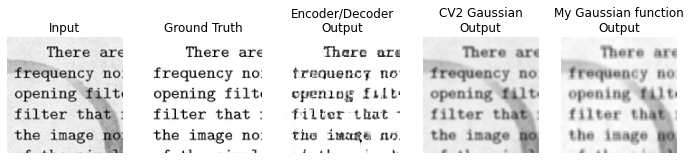

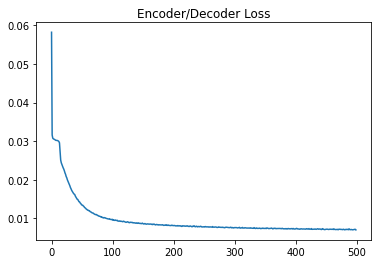

In [ ]:
# Processing Images
inpImage = noiseImg.cpu().permute(2,3,1,0).detach().numpy()[:,:,:,0]
clnImage = cleanImg.cpu().permute(2,3,1,0).detach().numpy()[:,:,:,0]
outImageGaussian = cv2.GaussianBlur(inpImage,(5,5),0)
myImageGaussian = denoise_gauss(inpImage[0:128,0:128])
outImageCNN = output.cpu().permute(2,3,1,0).detach().numpy()[:,:,:,0]

# Displaying images
fig, axis = plt.subplots(1, 5, figsize = (12,12))
plt.subplot(1, 5, 1)
plt.title("Input")
plt.axis('off')
plt.imshow((inpImage * 255).astype(np.uint8))
plt.subplot(1, 5, 2)
plt.title("Ground Truth")
plt.axis('off')
plt.imshow((clnImage * 255).astype(np.uint8))
plt.subplot(1, 5, 3)
plt.title("Encoder/Decoder\nOutput")
plt.axis('off')
plt.imshow(outImageCNN)
plt.subplot(1, 5, 4)
plt.title("CV2 Gaussian\nOutput")
plt.axis('off')
plt.imshow(outImageGaussian)
plt.subplot(1, 5, 5)
plt.title("My Gaussian function\nOutput")
plt.axis('off')
plt.imshow(myImageGaussian)
plt.show()

# Encoder/Decoder Loss Graph
plt.figure()
plt.plot(lossRecord)
plt.title("Encoder/Decoder Loss")
plt.show()




From the 5 images above we can see the input image, the truth and how the Encoder/Decoder performed when compared with the openCV gaussian function or my gaussian implementation.

From a first look we can see that the Encoder/Decoder output managed to remove the noise but it has problems maintaining full clarity and text integrity of the ground truth. The text is slightly hard to read due to the missing information lost in the compression. The text looks like a bad physical printing. 

The gaussian process will succesfully clear some images with less noise but it will struggle with iamges like the one above. It attempts to remove noise by blurring it but it cannont remove such lines.

Overall gaussian will maintains a more redable text on low noised images with fine details or lines. But in images with hard and big noise it will not work at all. In this case the CNN encoder/decoder will do a much better job even if the text might not look perfect or hard to read it will remove the noise whatever size it will be after a certain amount of training.

After 500 epoches the Encoder/Decoder could still reduce its loss value but it is not going to make a too much of a difference. We can see (from the line graph) that from around epoch 300 there will be a zig zag in the graph and the reduced loss is becoming insignificative.
